

Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

Key Features of the Dataset:
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns. Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories. Cardiovascular Health: Examine blood pressure and heart rate measurements. Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

Dataset Columns:

Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Details about Sleep Disorder Column:

None: The individual does not exhibit any specific sleep disorder.
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('./sleep_health_lifestyle/data/sleep_health_and_lifestyle_dataset.csv')

#### Exploratiry data analysis

In [95]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [97]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


**Description** <br>
there are 374 enteries with 13 total features. Person ID is removable. data types is consited of int, float and object. since in the dataset overview it is mentioned that NaN in the Sleep disorder is actually a valid data it is not considered a null value so this dataset doesnt have any null values. 
an important notes:
- we need to check and make sure about heart rate and blodd pressure outliers in case of any and change the object value to different float values.


In [98]:
df.drop('Person ID', axis =1 , inplace = True)

In [99]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [100]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [101]:
df['Sleep Disorder'] = df['Sleep Disorder'].replace({np.nan:'NaN'})

changing blood pressure to systolic and diastolic 

In [102]:
bl = df['Blood Pressure'] = df['Blood Pressure'].str.split('/')

In [103]:
df['bl_systolic'] = [item[0] for item in bl]
df['bl_diastolic'] = [item[1] for item in bl]

In [104]:
df['bl_systolic'] = df['bl_systolic'].astype('int')
df['bl_diastolic'] = df['bl_diastolic'].astype('int')

In [105]:
df.drop('Blood Pressure', axis = 1, inplace=True)

In [106]:
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bl_systolic,bl_diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90
7,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,120,80
8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,120,80
9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,NaN,120,80


### Visualising Numerical values

In [107]:
numerical_df = df.select_dtypes(include = ['float', 'int'])
def boxplot_per_feature(n, m , dataset):
    numerical_df = df.select_dtypes(include = ['float', 'int'])
    fig, axes = plt.subplots(n, m, figsize=(10, 10))
    ax = axes.flatten()
    # Plot each feature against target
    for i, feature in enumerate(numerical_df):
        ax[i].boxplot(dataset[feature])
        ax[i].set_xticklabels([feature], color = 'red')  
        ax[i].set_ylabel('ranges')
        ax[i].set_title(f'{feature} Boxplot')
    # Hide any empty subplots
    for i in range(len(numerical_df.columns), len(ax)):
        ax[i].set_visible(False)
    plt.tight_layout()
    plt.show()

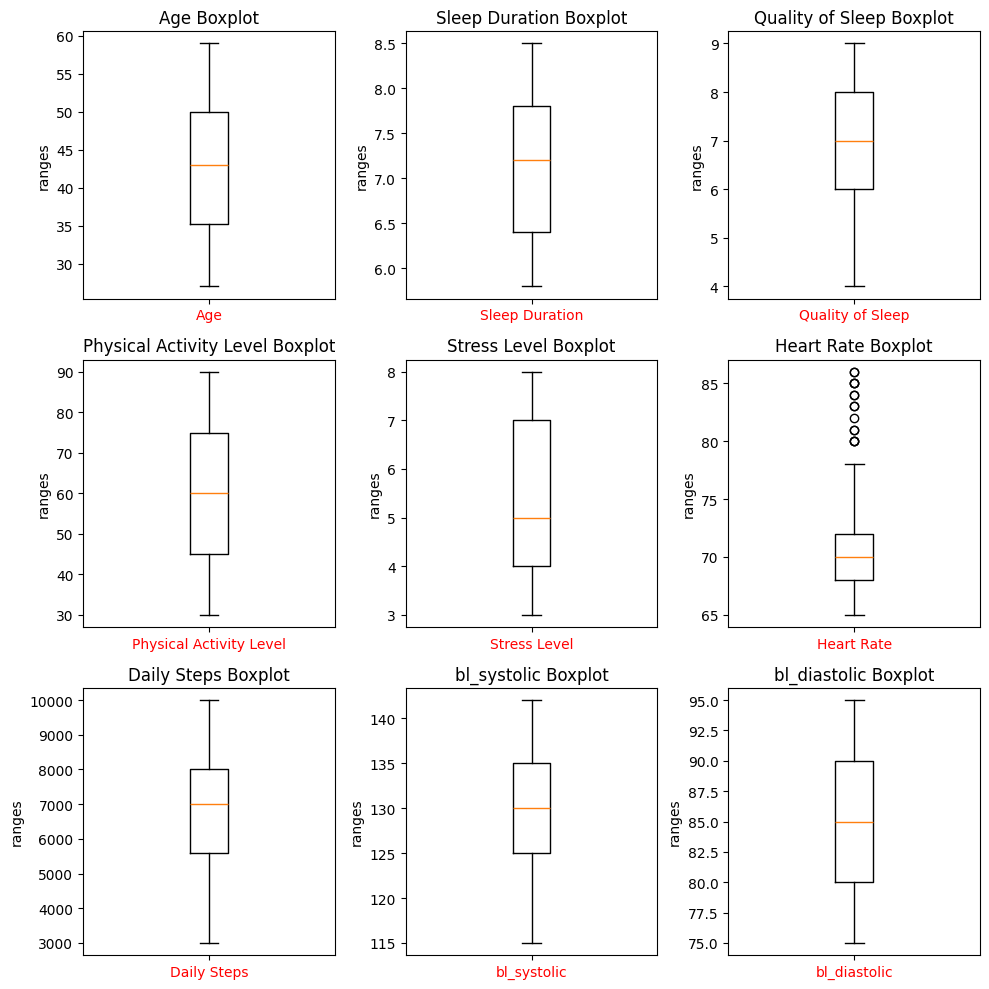

In [108]:
boxplot_per_feature(3 , 3, numerical_df)

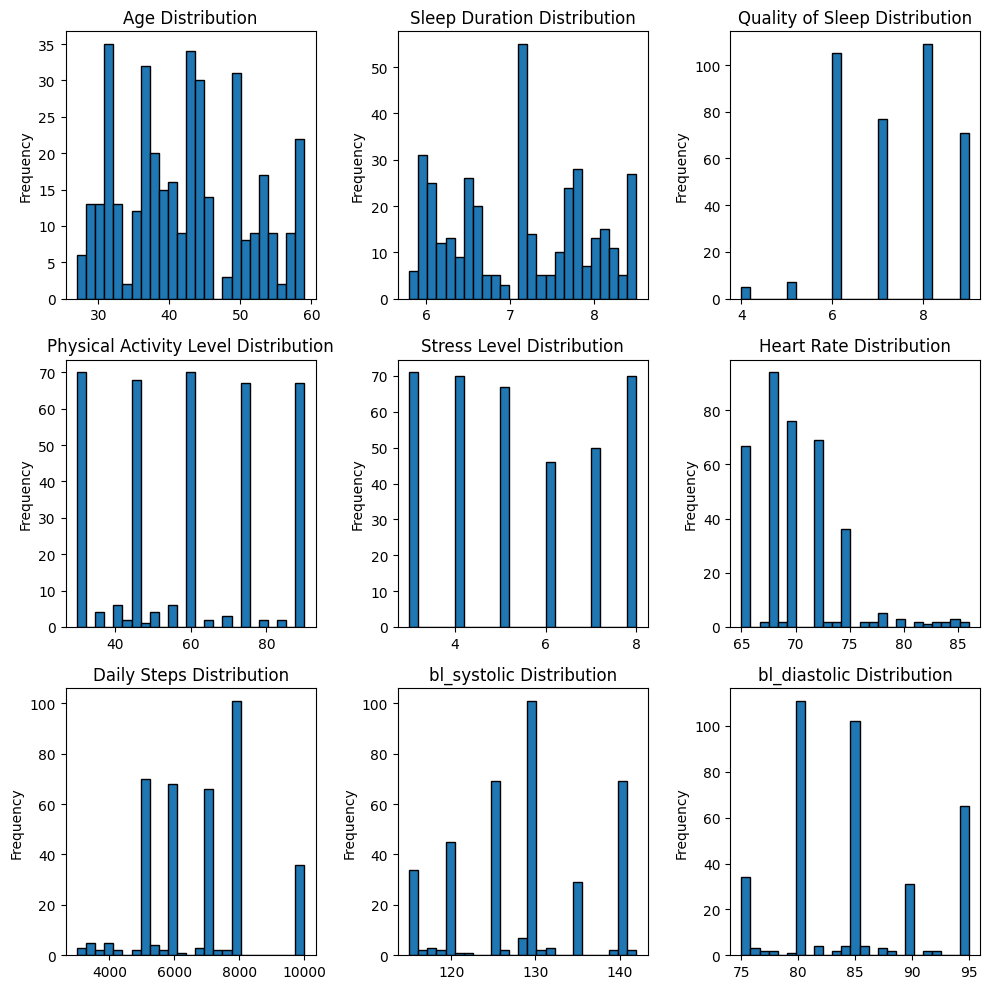

In [109]:
#best format
numerical_df = df.select_dtypes(include=['float', 'int'])
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = ax.flatten()
for i, feature in enumerate(numerical_df.columns):
    ax[i].hist(numerical_df[feature], bins=25, edgecolor='black')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(f'{feature} Distribution')  
for i in range(len(numerical_df.columns), len(ax)):
    ax[i].set_visible(False)
plt.tight_layout()
plt.show()

Visualising categorical values

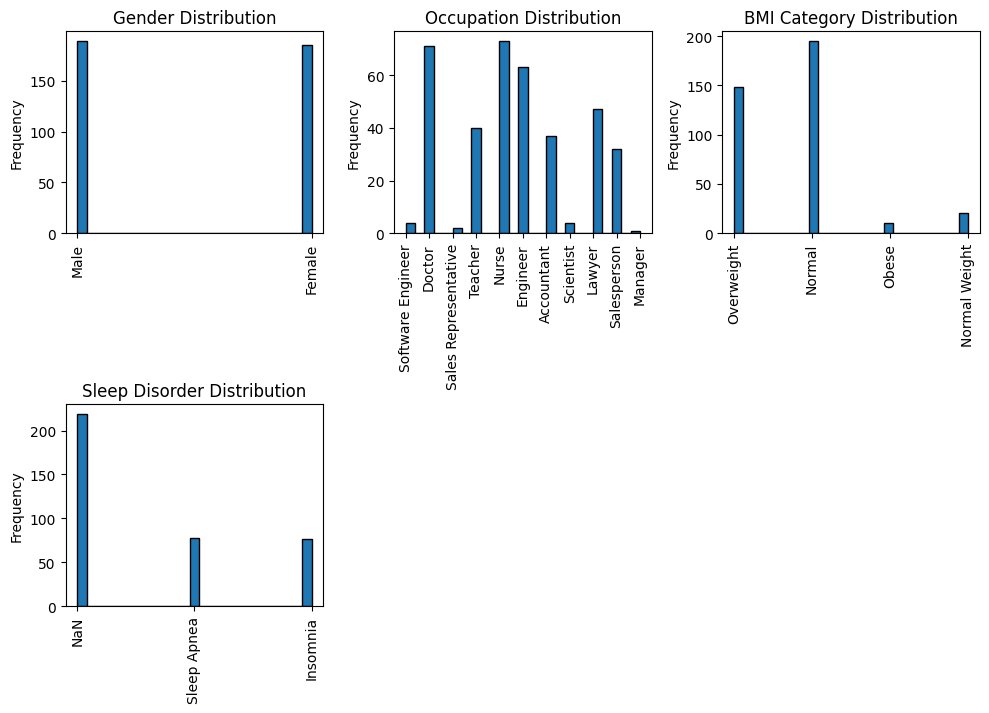

In [110]:
categorical_df = df.select_dtypes(include='object')
#best format
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = ax.flatten()
for i, feature in enumerate(categorical_df.columns):
    ax[i].hist(categorical_df[feature], bins=25, edgecolor='black')
    ax[i].set_ylabel('Frequency')
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_title(f'{feature} Distribution')  
for i in range(len(categorical_df.columns), len(ax)):
    ax[i].set_visible(False)
plt.tight_layout()
plt.show()

#### Corellations

In [111]:
numerical_df = df.select_dtypes(include=['float', 'int'])
numerical_df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,bl_systolic,bl_diastolic
0,27,6.1,6,42,6,77,4200,126,83
1,28,6.2,6,60,8,75,10000,125,80
2,28,6.2,6,60,8,75,10000,125,80
3,28,5.9,4,30,8,85,3000,140,90
4,28,5.9,4,30,8,85,3000,140,90
...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,140,95
370,59,8.0,9,75,3,68,7000,140,95
371,59,8.1,9,75,3,68,7000,140,95
372,59,8.1,9,75,3,68,7000,140,95


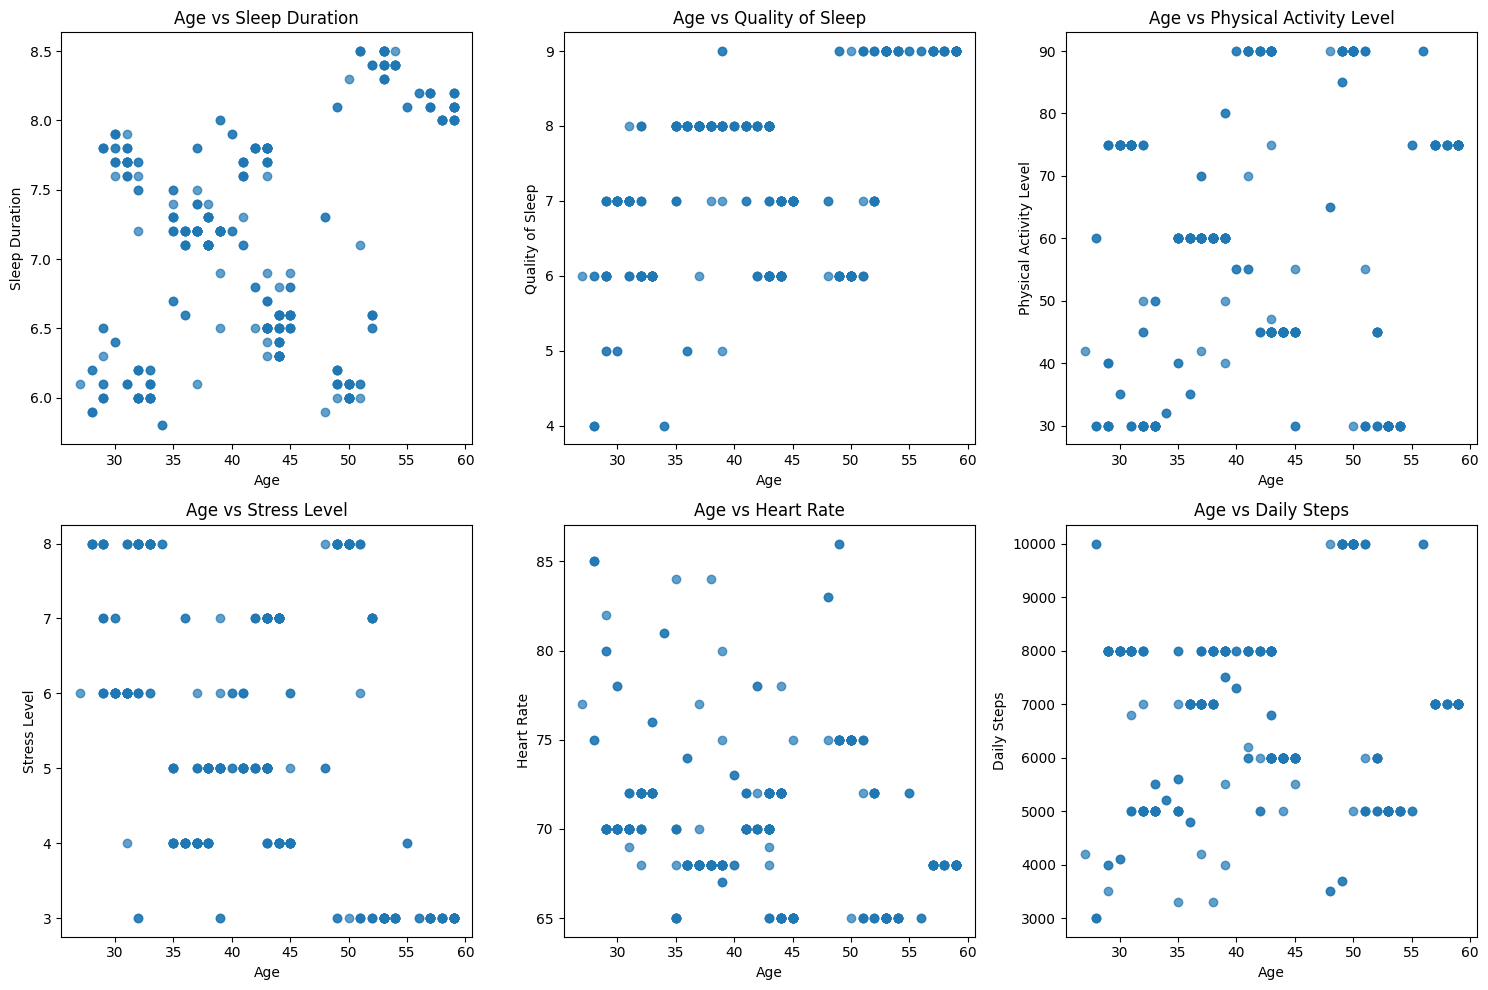

In [112]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  
other_columns = [col for col in numerical_df.columns if col != 'Age']

for i, column in enumerate(other_columns):
    if i < len(axes):  
        axes[i].scatter(numerical_df['Age'], numerical_df[column], alpha=0.7)
        axes[i].set_title(f'Age vs {column}')
        axes[i].set_xlabel('Age')
        axes[i].set_ylabel(column)
for i in range(len(other_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

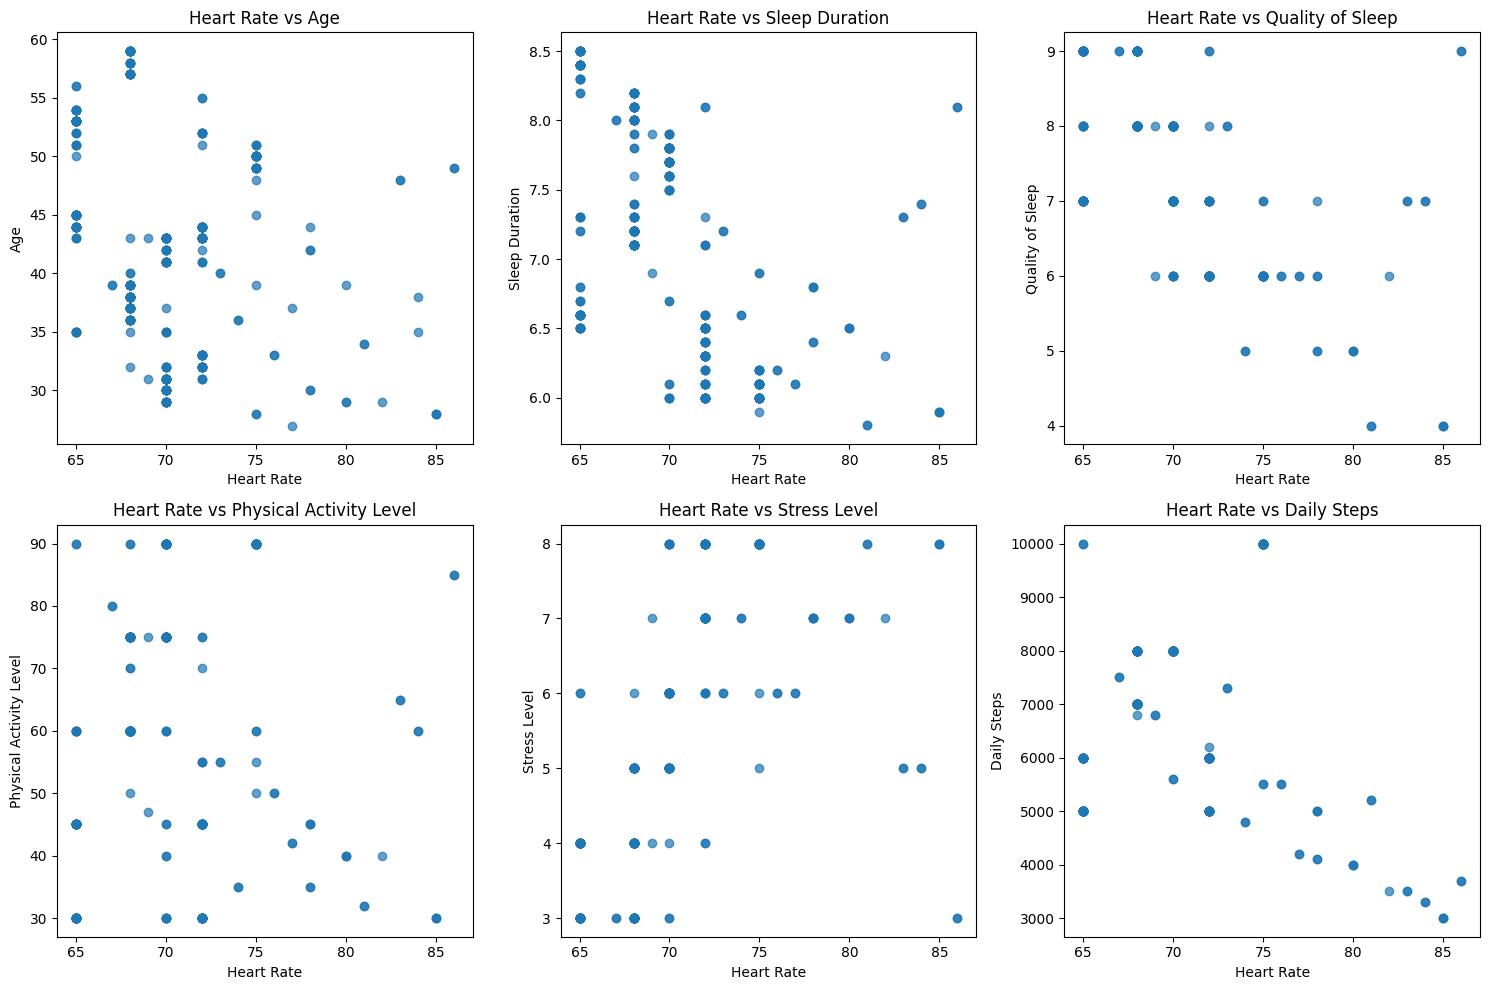

In [113]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  
other_columns = [col for col in numerical_df.columns if col != 'Heart Rate']

for i, column in enumerate(other_columns):
    if i < len(axes):  
        axes[i].scatter(numerical_df['Heart Rate'], numerical_df[column], alpha=0.7)
        axes[i].set_title(f'Heart Rate vs {column}')
        axes[i].set_xlabel('Heart Rate')
        axes[i].set_ylabel(column)
for i in range(len(other_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

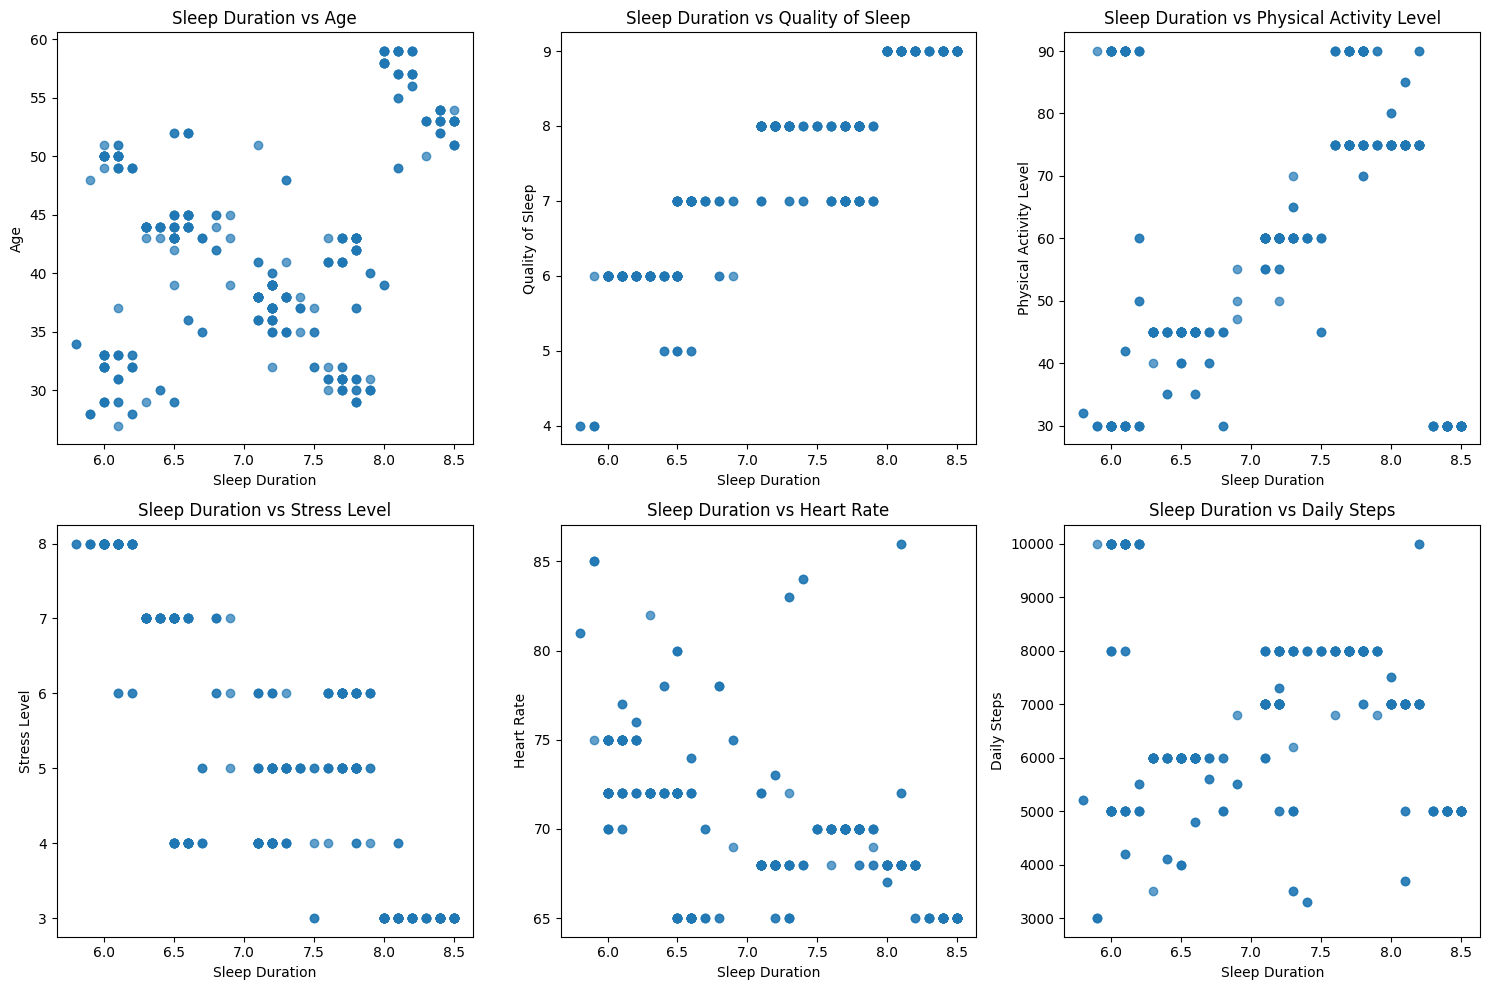

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  
other_columns = [col for col in numerical_df.columns if col != 'Sleep Duration']

for i, column in enumerate(other_columns):
    if i < len(axes):  
        axes[i].scatter(numerical_df['Sleep Duration'], numerical_df[column], alpha=0.7)
        axes[i].set_title(f'Sleep Duration vs {column}')
        axes[i].set_xlabel('Sleep Duration')
        axes[i].set_ylabel(column)
for i in range(len(other_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [115]:
correlation_matrix = numerical_df.corr()

In [116]:
correlation_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,bl_systolic,bl_diastolic
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973,0.605878,0.593839
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533,-0.180406,-0.166570
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791,-0.121632,-0.110151
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723,0.265416,0.382651
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829,0.102818,0.091811
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309,0.294143,0.271092
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000,0.103342,0.241986
bl_systolic,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,0.103342,1.000000,0.972885
bl_diastolic,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.241986,0.972885,1.000000


In [117]:
ru = 0.5
high_corr = np.abs(correlation_matrix) >= ru
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): 
        if high_corr.iloc[i, j]:
            corr_value = correlation_matrix.iloc[i, j]
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_value))

for col1, col2, value in high_corr_pairs:
    print(f"{col1} - {col2}: {value:.3f}")

Age - bl_systolic: 0.606
Age - bl_diastolic: 0.594
Sleep Duration - Quality of Sleep: 0.883
Sleep Duration - Stress Level: -0.811
Sleep Duration - Heart Rate: -0.516
Quality of Sleep - Stress Level: -0.899
Quality of Sleep - Heart Rate: -0.660
Physical Activity Level - Daily Steps: 0.773
Stress Level - Heart Rate: 0.670
bl_systolic - bl_diastolic: 0.973


In [119]:
X = df.drop('Sleep Disorder', axis = 1)
y = df['Sleep Disorder']

### Encoding

In [123]:
df1 = pd.get_dummies(X.Gender)


In [124]:
X = pd.concat([X, df1],axis = 1).reindex(df.index)
X.drop('Gender', axis =1 , inplace = True)

In [125]:
df_2 = pd.get_dummies(X['Occupation'])
X = pd.concat([X, df_2], axis =1 ).reindex(df.index)
X.drop('Occupation', axis = 1, inplace = True)

In [126]:
df_2 = pd.get_dummies(X['BMI Category'])
X = pd.concat([X, df_2], axis =1 ).reindex(df.index)
X.drop('BMI Category', axis = 1, inplace = True)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

### Standardsising and scaling the data

In [130]:
feature_columns = ['Age', 'Sleep Duration', 'Quality of Sleep',	'Physical Activity Level',	'Stress Level',	'Heart Rate', 'Daily Steps', 'bl_systolic', 'bl_diastolic']
scaler = StandardScaler()
X = scaler.fit_transform(X[feature_columns])

X_scaled = pd.DataFrame(X, columns=feature_columns)


In [131]:
X_scaled.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,bl_systolic,bl_diastolic
count,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,-4.559633e-16,1.348891e-15,2.469801e-16,-3.324732e-17,1.994839e-16,-1.377389e-15,-9.499234e-17,-9.119265e-16,-8.359326e-16
std,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,-1.753096e+00,-1.676439e+00,-2.771424e+00,-1.402260e+00,-1.345836e+00,-1.250750e+00,-2.362273e+00,-1.751604e+00,-1.568203e+00
25%,-8.006081e-01,-9.213348e-01,-1.098280e+00,-6.812078e-01,-7.815505e-01,-5.243827e-01,-7.531140e-01,-4.592388e-01,-7.556402e-01
50%,9.415288e-02,8.547080e-02,-2.617083e-01,3.984423e-02,-2.172650e-01,-4.013793e-02,1.133560e-01,1.869437e-01,5.692287e-02
75%,9.023241e-01,8.405750e-01,5.748635e-01,7.608963e-01,9.113060e-01,4.441068e-01,7.322631e-01,8.331262e-01,8.694859e-01
max,1.941401e+00,1.721530e+00,1.411435e+00,1.481948e+00,1.475592e+00,3.833820e+00,1.970077e+00,1.737782e+00,1.682049e+00


### Modelling

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y , test_size = .2)

In [142]:
log_model = sm.MNLogit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.320841
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  299
Model:                        MNLogit   Df Residuals:                      279
Method:                           MLE   Df Model:                           18
Date:                Tue, 18 Nov 2025   Pseudo R-squ.:                  0.6649
Time:                        10:01:20   Log-Likelihood:                -95.932
converged:                       True   LL-Null:                       -286.32
Covariance Type:            nonrobust   LLR p-value:                 9.261e-70
                    y=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.0062      0.480      4.176      0.000       1.065   

### Statistical Significance Analysis

Highly Significant Predictors (p < 0.01):

    Age: Strong negative relationship (coef: -1.98) - Older individuals are significantly less likely to be in this health category

    Quality of Sleep: Strong positive relationship (coef: 3.44) - Better sleep quality dramatically increases the likelihood of positive health outcomes

    Daily Steps: Positive relationship (coef: 3.66) - Higher daily step count significantly improves health classification probability

Marginally Significant Predictors (p < 0.10):

    Physical Activity Level: Negative relationship (coef: -1.51, p=0.077) - Suggests higher activity may reduce risk, but evidence is borderline

    Blood Pressure (Systolic): Negative relationship (coef: -3.87, p=0.066) - Higher systolic pressure trends toward negative health impact

Non-Significant Predictors (p > 0.10):

    Sleep Duration, Stress Level, Heart Rate, and Diastolic BP show no statistically reliable effects

Magnitude and Direction Interpretation

Strongest Protective Factors:

    Quality of Sleep (coef: +3.44) - Each unit improvement multiplies odds by ~31x (e^3.44)

    Daily Steps (coef: +3.66) - Substantial positive impact on health classification

Strongest Risk Factors:

    Age (coef: -1.98) - Aging significantly reduces probability of positive health outcome

    Systolic BP (coef: -3.87) - High systolic pressure shows strong negative trend

Notable Interaction:

    Blood Pressure Paradox: While systolic shows negative trend, diastolic shows strong positive effect (coef: +6.31, p=0.003) - this counterintuitive result warrants investigation into measurement or physiological explanations

Clinical/Practical Implications

Key Levers for Intervention:

    Focus on sleep quality improvement rather than just sleep duration

    Step count targets appear highly effective for health improvement

    Age-related strategies needed to counteract natural decline

Areas for Further Investigation:

    The contradictory blood pressure effects suggest possible collinearity or complex physiological interactions

    Non-significant factors (stress, heart rate) may operate through indirect pathways or require different measurement approaches



In [156]:
classification_models = {'ridge':RidgeClassifierCV(cv = 10 , alphas=[1e-3, 1e-2, 1], class_weight='balanced'), 
                        'decision_tree': DecisionTreeClassifier(max_depth= 5),
                        'knn':KNeighborsClassifier(n_neighbors=4), 'NB': GaussianNB(), 'gb':GradientBoostingClassifier(n_estimators=240), 
                        'RF':RandomForestClassifier(max_depth=10, class_weight='balanced'),
                        'svm': SVC(class_weight='balanced', random_state=42, probability=True)}

In [157]:
results = {}
for model_name, model in classification_models.items():
    print(f"Training {model_name}...")
    
    # Fit the model
    model_fitted = model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model_fitted.predict(X_train)
    y_test_pred = model_fitted.predict(X_test)
    
    results[model_name] = {
        'fitted': model_fitted,
        'preds': y_test_pred
    }
    
    # Handle probabilities and ROC AUC for multi-class
    try:
        y_test_prob = model_fitted.predict_proba(X_test)
        results[model_name]['probs'] = y_test_prob
    except AttributeError:
        # Models without predict_proba (like RidgeClassifier)
        results[model_name]['probs'] = None
        results[model_name]['ROC_AUC_test'] = 0
    
    # Calculate all metrics with multi-class averaging
    results[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train, y_train_pred)
    results[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test, y_test_pred)
    
    # For multi-class, specify averaging method
    results[model_name]['Recall_train'] = metrics.recall_score(
        y_train, y_train_pred, average='weighted'
    )
    results[model_name]['Recall_test'] = metrics.recall_score(
        y_test, y_test_pred, average='weighted'
    )
    results[model_name]['F1_test'] = metrics.f1_score(
        y_test, y_test_pred, average='weighted'
    )
    results[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test, y_test_pred)
    
    print(f"{model_name} - Accuracy: {results[model_name]['Accuracy_test']:.4f}, "
          f"Recall: {results[model_name]['Recall_test']:.4f}, "
          f"F1: {results[model_name]['F1_test']:.4f}")

Training ridge...
ridge - Accuracy: 0.8400, Recall: 0.8400, F1: 0.8409
Training decision_tree...
decision_tree - Accuracy: 0.8400, Recall: 0.8400, F1: 0.8380
Training knn...
knn - Accuracy: 0.8533, Recall: 0.8533, F1: 0.8519
Training NB...
NB - Accuracy: 0.8267, Recall: 0.8267, F1: 0.8276
Training gb...
gb - Accuracy: 0.8800, Recall: 0.8800, F1: 0.8783
Training RF...
RF - Accuracy: 0.8800, Recall: 0.8800, F1: 0.8783
Training svm...
svm - Accuracy: 0.8400, Recall: 0.8400, F1: 0.8406


### Overall Performance Assessment <br>
All models demonstrate strong predictive capability with accuracy scores ranging from 82.67% to 88.00%, indicating robust performance across different algorithmic approaches for this multi-class classification task.
Model Ranking and Superior Performers

Top Tier (88.00% Accuracy):

    Gradient Boosting (GB) and Random Forest (RF) emerge as the best performers, both achieving 88.00% accuracy with nearly identical F1-scores (87.83%)

    These ensemble methods leverage multiple weak learners to capture complex patterns, demonstrating their effectiveness for this dataset

Second Tier (85.33% Accuracy):

    K-Nearest Neighbors (KNN) shows competitive performance at 85.33% accuracy, suggesting that similar instances in the feature space share common class labels

Third Tier (84.00% Accuracy):

    Ridge, Decision Tree, and SVM cluster together at 84.00% accuracy, indicating consistent baseline performance across linear, tree-based, and kernel-based approaches

Base Performer (82.67% Accuracy):

    Naive Bayes (NB) performs slightly lower but still achieves respectable results, which is notable given its simplicity and independence assumptions

Key Insights and Patterns

Algorithm Family Performance:

    Ensemble methods dominate (GB, RF), highlighting the value of combining multiple models

    Distance-based learning (KNN) outperforms several more complex algorithms

    All models perform reasonably well, suggesting the features contain meaningful predictive signals

Consistency Across Metrics:

    The near-identical values for Accuracy, Recall, and F1-score across all models indicate balanced class performance with minimal precision-recall tradeoffs

    This consistency suggests the multi-class problem is well-structured with clear decision boundaries

Practical Implications:

    The 5.33% performance gap between best and worst models represents meaningful differences in real-world applications

    Gradient Boosting and Random Forest provide the most reliable predictions for deployment

    The strong performance across diverse algorithms increases confidence in the overall solution robustness

Recommendations

    Primary Selection: Gradient Boosting or Random Forest for production deployment

    Lightweight Alternative: KNN if computational efficiency is prioritized

    Further Investigation: Explore why Naive Bayes underperforms relative to other models

    Next Steps: Consider hyperparameter tuning on the top performers to potentially push accuracy beyond 88%

The results demonstrate that this is a well-posed classification problem where multiple machine learning approaches can achieve strong, consistent results.

In [ ]:
# Define parameter grids for each model
param_grids = {
    'ridge': {'alphas': [[1e-3, 1e-2, 1e-1, 1, 10, 100]]},
    'decision_tree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    },
    'RF': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    'gb': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'svm': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    }
}

results = {}
for model_name, model in classification_models.items():
    print(f"Training {model_name}...")
    
    if model_name in param_grids:
        # Use GridSearchCV for tuning
        grid_search = GridSearchCV(
            model, 
            param_grids[model_name], 
            cv=5, 
            scoring='accuracy',
            n_jobs=-1,  # Use all available cores
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        
        # Get best model
        model_fitted = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")
        
    else:
        # Use default model (for Naive Bayes, etc.)
        model_fitted = model.fit(X_train, y_train)
    
    # Continue with your existing evaluation code...
    y_test_pred = model_fitted.predict(X_test)
    
    results[model_name] = {
        'fitted': model_fitted,
        'preds': y_test_pred,
        'Accuracy_test': metrics.accuracy_score(y_test, y_test_pred),
        'F1_test': metrics.f1_score(y_test, y_test_pred, average='weighted')
    }

Training ridge...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'alphas': [0.001, 0.01, 0.1, 1, 10, 100]}
Best CV score: 0.8731
Training decision_tree...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'max_depth': 3, 'min_samples_split': 5}
Best CV score: 0.9164
Training knn...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best CV score: 0.8964
Training NB...
Training gb...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Best CV score: 0.9164
Training RF...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score: 0.9198
Training svm...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 100, 'kernel': 'poly'}
Best CV score: 0.9265


**Performance Transformation After Tuning**
CV Score Rankings (Significant Improvement):
- SVM: 92.65%
- Random Forest: 91.98% 
- Decision Tree & Gradient Boosting: 91.64% 
- KNN: 89.64%
- Ridge: 87.31%